## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Запрос к базе данных

In [4]:
query = 'SELECT timestamp FROM checker WHERE uid LIKE "user_%"'
checker = pd.read_sql(query, connection)
checker

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## Датафрейм и график

In [5]:
checker['timestamp'] = pd.to_datetime(checker['timestamp'])
checker['daytime'] = pd.cut(checker['timestamp'].dt.hour, bins=[-0.99, 4, 10, 17, 24], labels=['night', 'morning', 'afternoon', 'evening'])
checker['timestamp'] = checker['timestamp'].dt.date
daytime = pd.get_dummies(checker['daytime']).astype(int)
checker = pd.concat([checker, daytime], axis=1)
del checker['daytime']
checker = checker.groupby('timestamp').sum().reset_index()
checker.count()


timestamp    35
night        35
morning      35
afternoon    35
evening      35
dtype: int64

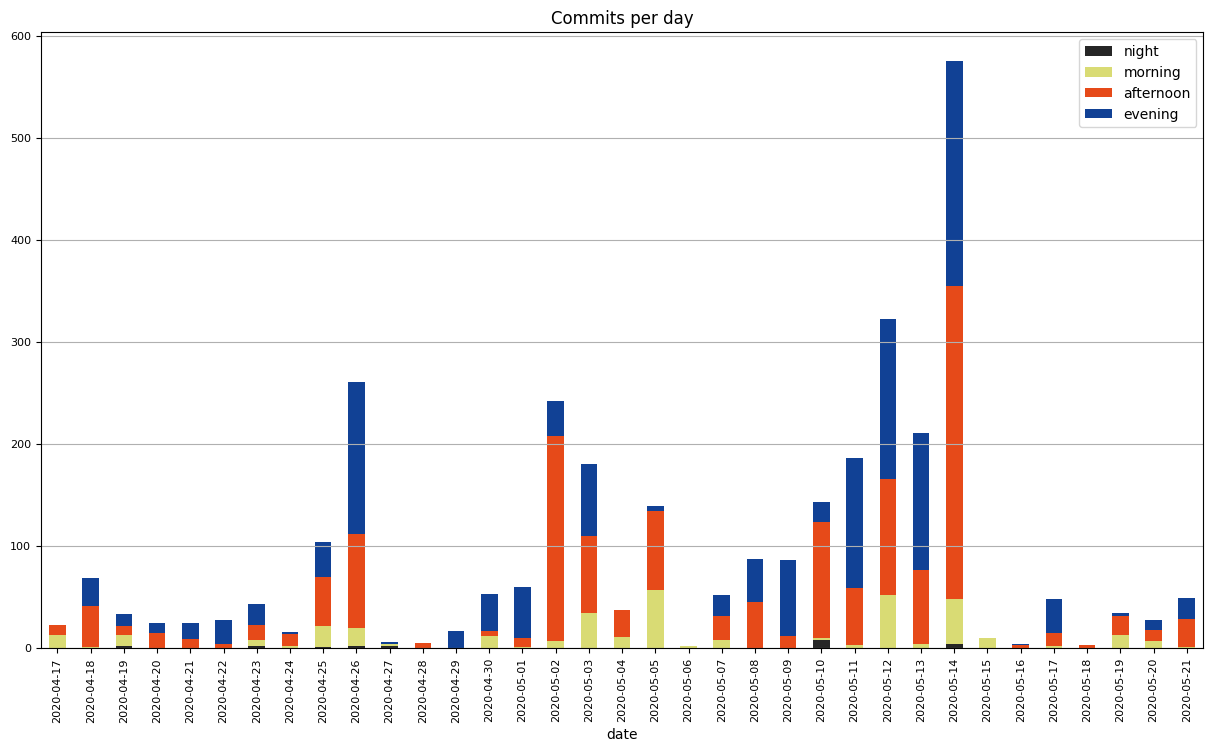

In [6]:
checker.plot(kind='bar', x='timestamp', y=['night', 'morning', 'afternoon', 'evening'], title='Commits per day', 
             xlabel='date', figsize=(15,8), legend=True, fontsize=8, rot=90, 
             stacked=True, color=['#262626FF', '#D9DB74FF', '#E64A19FF', '#114195FF']).yaxis.grid(True)

## Закрытие соединения с БД

In [7]:
connection.close()

## Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?

### Ответ: вечером и днем


## В какой день наибольшее количество коммитов и в то же время количество коммитов вечером больше, чем днем?

### Ответ: 2020-05-12